# Agent

에이전트(Agents)는 언어 모델과 도구를 결합하여 작업에 대해 추론하고, 사용할 도구를 결정하며, 솔루션을 향해 반복적으로 작업할 수 있는 시스템을 만듭니다. `create_agent`는 프로덕션에 바로 사용 가능한 에이전트 구현을 제공합니다. LLM 에이전트는 목표를 달성하기 위해 도구를 반복적으로 실행합니다.

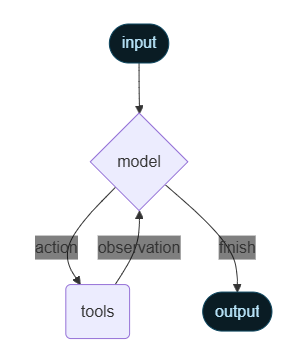

### LLM 연결

In [ ]:
# model = init_chat_model("gpt-5-nano", model_provider="openai")

### ReAct Agent 생성

In [ ]:
def search_database(query: str, limit: int = 10) -> str:
def search_db(query: str) -> str:
def get_weather(location: str) -> str:

## 동적 모델(Dynamic model)

동적 모델은 현재 **상태(state)** 와 **컨텍스트(context)** 를 기반으로 **런타임** 에 선택됩니다. 이를 통해 정교한 라우팅 로직과 비용 최적화가 가능합니다. 동적 모델을 사용하려면 `@wrap_model_call` 데코레이터를 사용하여 요청의 모델을 수정하는 미들웨어를 생성합니다.

In [ ]:
# basic_model = ChatOpenAI(model="gpt-5-nano")
# advanced_model = ChatOpenAI(model="gpt-5-mini")
def dynamic_model_selection(request: ModelRequest, handler) -> ModelResponse:
    # 현재 대화에서 주고받은 메시지 개수를 계산
    # 메시지가 10개를 초과하면 복잡한 대화로 간주 → 고급 모델 사용
        # 긴 대화일 경우 고급(Advanced) 모델 사용
        # 짧은 대화일 경우 기본(Basic) 모델 사용
    # 선택된 모델을 request에 설정
    # handler를 호출하여 요청 처리 계속 진행

## 도구 오류 처리 (Tool error handling)

도구 실행 중 발생하는 오류를 커스터마이징하려면, @wrap_tool_call 데코레이터를 사용하여 미들웨어(middleware) 를 생성하면 됩니다.

In [ ]:
def handle_tool_errors(request, handler):
        # 정상적으로 도구 요청을 처리
        # 오류 발생 시 모델에게 사용자 친화적인 에러 메시지를 반환

## 시스템 프롬프트 (System prompt)

에이전트가 작업을 수행하는 방식을 제어하려면 시스템 프롬프트(System prompt) 를 제공할 수 있습니다.  
이때, system_prompt 매개변수는 문자열(String) 형태로 지정할 수 있습니다.

## 동적 시스템 프롬프트 (Dynamic system prompt)

실행 시점의 컨텍스트(runtime context) 나 에이전트 상태(agent state) 에 따라 시스템 프롬프트를 동적으로 변경해야 하는 고급 사용 사례에서는 미들웨어(middleware) 를 사용할 수 있습니다.  
@dynamic_prompt 데코레이터를 사용하면, 모델 요청(model request) 에 따라 시스템 프롬프트를 동적으로 생성하는 미들웨어를 만들 수 있습니다.

In [ ]:
class Context(TypedDict):
def user_role_prompt(request: ModelRequest) -> str:
    # 실행 컨텍스트(runtime context)에서 사용자 역할 정보를 가져옴
    # 기본값은 "user"
    # 기본 프롬프트 정의
    # 사용자 역할에 따라 프롬프트를 다르게 설정
        # 전문가(expert)인 경우: 기술적으로 자세한 답변을 제공
        # 초보자(beginner)인 경우: 쉬운 설명과 비전문 용어 사용
# 실행 컨텍스트(context)에 따라 시스템 프롬프트가 동적으로 설정됨

## 호출 (Invocation)

에이전트는 State(상태) 에 대한 업데이트를 전달하여 호출할 수 있습니다.  
모든 에이전트는 상태 안에 메시지들의 시퀀스(sequence of messages) 를 포함하고 있으며, 에이전트를 호출하려면 새로운 메시지를 전달하면 됩니다.

## 구조화된 출력 (Structured output)

특정 상황에서는 에이전트가 정해진 형식의 출력 결과를 반환하도록 하고 싶을 때가 있습니다.  
이때 LangChain은 response_format 매개변수를 통해 구조화된 출력을 생성하는 여러 가지 방법을 제공합니다.

In [ ]:
class ContactInfo(BaseModel):